In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pathlib

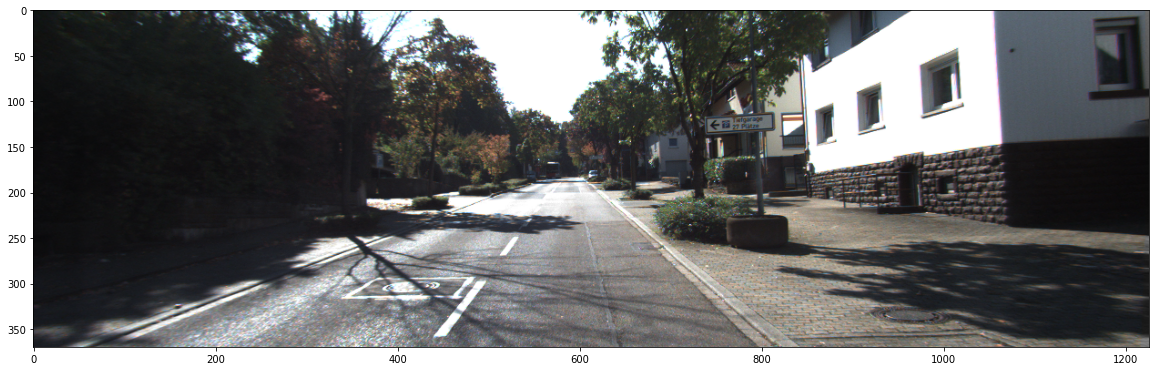

In [2]:
kitti_base_dir='/Users/akshitjain/ext/workspace/datasets/kitti_2012/stereo_flow/training'
l_img_path = kitti_base_dir+'/colored_0/000000_10.png'
l_im = cv.cvtColor(cv.imread(l_img_path), cv.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(l_im)

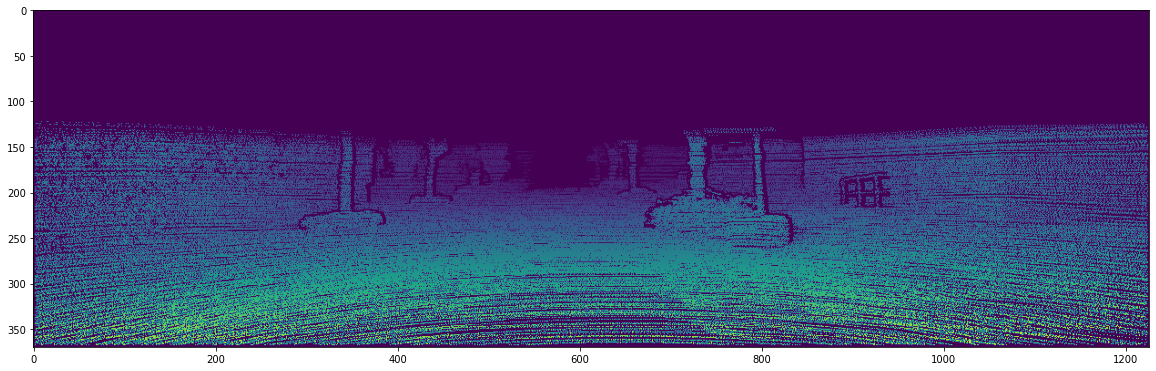

In [3]:
d_img_path = kitti_base_dir+'/disp_occ/000000_10.png'
im = cv.imread(d_img_path, flags=cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.imshow(im)

(array([ 8627., 12478., 22886., 37955., 26279., 16117., 16294., 10702.,
         9912.,  1333.]),
 array([ 4. , 10.5, 17. , 23.5, 30. , 36.5, 43. , 49.5, 56. , 62.5, 69. ]),
 <a list of 10 Patch objects>)

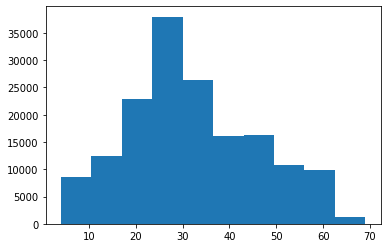

In [10]:
plt.hist(im[im>0].flatten())

In [33]:
total_px = im.flatten().shape[0]
dinfo_px = np.sum(im>0)
print('depth info for {}% pxs'.format(np.round(dinfo_px*100/total_px)))

depth info for 19.0% pxs


(array([ 4758.,  8472.,  8025.,  7412., 12902., 15725., 14209.,  6998.,
         6211.,  4263.]),
 array([ 4., 10., 16., 22., 28., 34., 40., 46., 52., 58., 64.]),
 <a list of 10 Patch objects>)

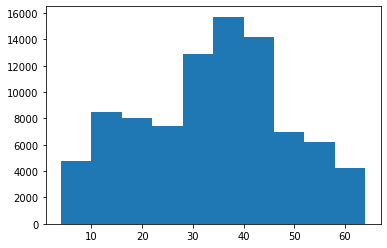

In [36]:
# scipy.stats.describe(im)
plt.hist(im[im>0])

In [11]:
pos=np.array([225, 849])
im[pos[0], pos[1]]
warped_im = np.ones_like(l_im)*255
def warp(pos):
    shift_x=im[pos[0], pos[1]]
    x=pos[1]
    y=pos[0]
    warped_im[y, np.clip(x-shift_x, 0, im.shape[1]-1)] = l_im[y, x]
    
np.apply_along_axis(warp, 1, np.argwhere(im>0))

array([None, None, None, ..., None, None, None], dtype=object)

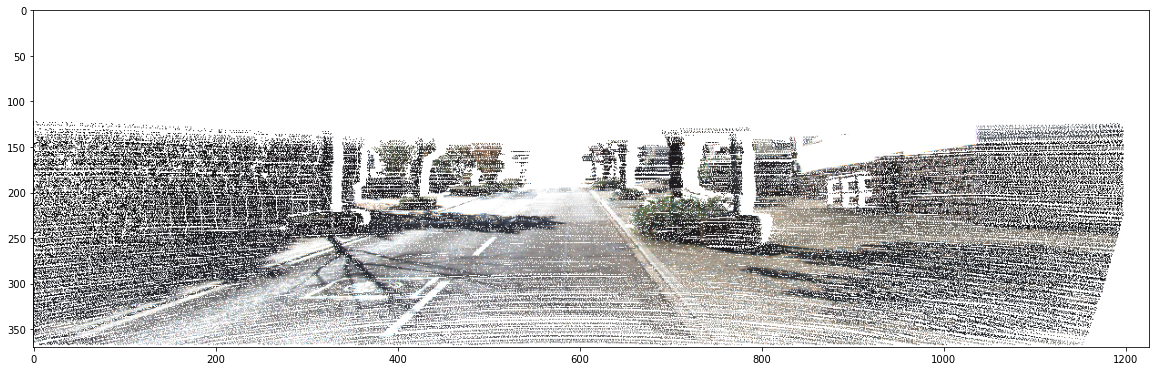

In [12]:
plt.figure(figsize=(20,10))
plt.imshow(warped_im)

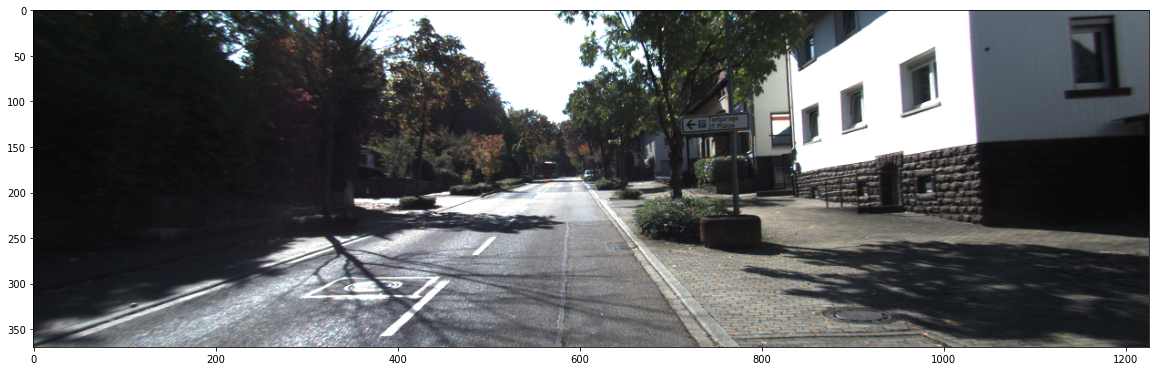

In [13]:
r_img_path = kitti_base_dir+'/colored_1/000000_10.png'
r_im = cv.cvtColor(cv.imread(r_img_path), cv.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(r_im)

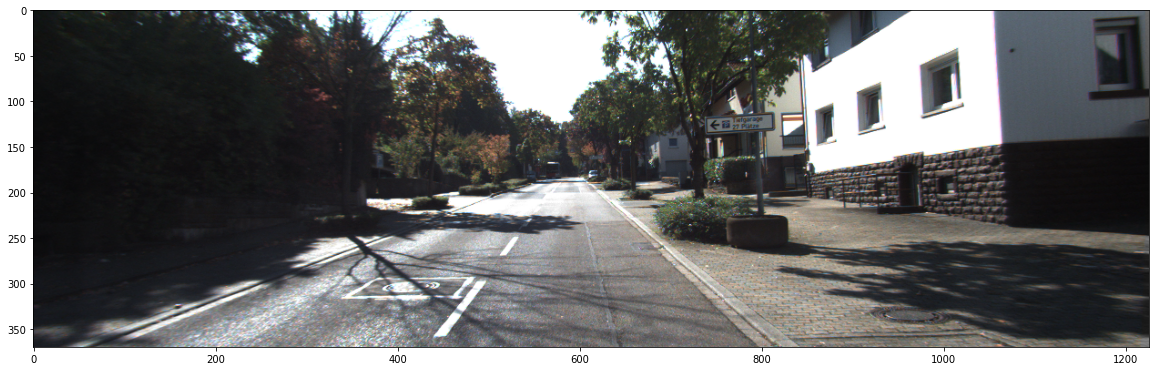

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(l_im)

In [15]:
kitti_dir = pathlib.Path('/Users/akshitjain/ext/workspace/datasets/kitti_2012/stereo_flow/training/image_2')
imgs = list(kitti_dir.glob('[!.]*.png'))

In [22]:
import pandas as pd

In [25]:
df=pd.DataFrame(imgs, columns=['fname'])

In [26]:
df['shape'] = df.fname.apply(lambda p: cv.imread(str(p)).shape)

In [34]:
df.groupby('shape').count().idxmax().fname

(375, 1242, 3)

# sparse to dense

In [14]:
nan_mask = im==0
im_dense = cv.inpaint(im, nan_mask.astype(np.uint8), inpaintRadius=4, flags=cv.INPAINT_NS)

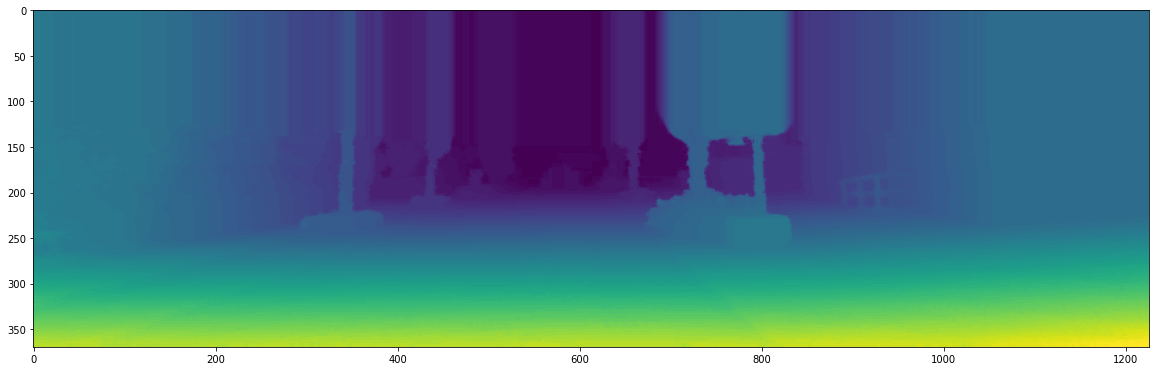

In [11]:
plt.figure(figsize=(20,10))
plt.imshow(im_dense)

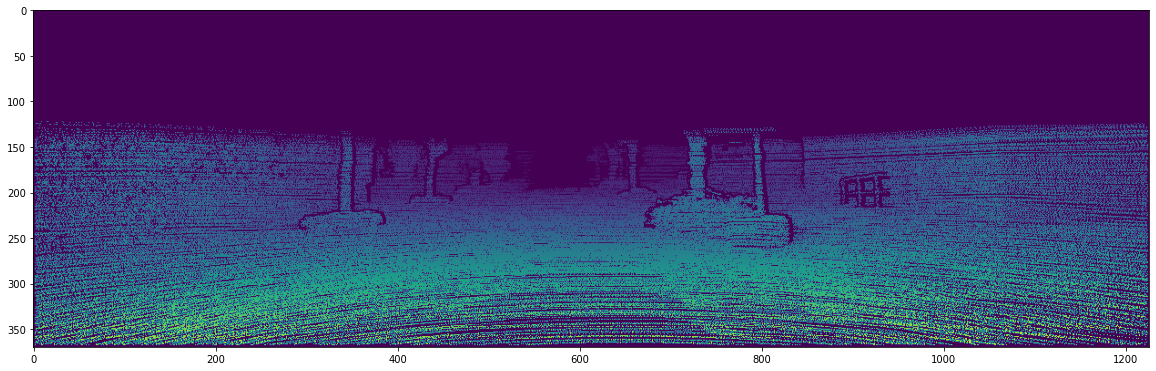

In [13]:
plt.figure(figsize=(20,10))
plt.imshow(im)